# Multiobjective optimalization

In [1]:
using EO

### Knapsack

In [2]:
pop_size = 100
dimension = 10

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([enclose_arguments(EO.f_weighted_sum, ones(dimension)), enclose_arguments(EO.f_weighted_sum, zeros(dimension))])
initialization      = enclose_noargs(binary_initialization, dimension, pop_size, objective_function)
selection           = enclose_arguments(EO.s_identity, pop_size*2)
crossover           = cr_single_point
mutation            = enclose_arguments(basic_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, 1000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution
@show EO.get_domination_count(solution.fitness)

#EO.plot_results(solution)

solution = top_x: Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
top_f: 0.0
penalty: 0.0



LoadError: type Result_big has no field fitness

In [3]:
using Plots

x = map(x->x[2][1], enumerate(solution.fitness))
y = map(x->x[2][2], enumerate(solution.fitness))
scatter(x, y)

LoadError: type Result_big has no field fitness

### Two simple objectives

In [4]:
using EO

pop_size = 100
dimension = 2

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([enclose_arguments(EO.f_sphere, ones(dimension)), EO.f_rastrigin])
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, -100, 100)
selection           = enclose_arguments(EO.s_identity, pop_size*2)
crossover           = cr_single_point
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, 10000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution

solution = top_x: Real[0.9915505267258855, 0.013271043244746872]
top_f: 0.97370542769792
penalty: 1.0321824616948483



top_x: Real[0.9915505267258855, 0.013271043244746872]
top_f: 0.97370542769792
penalty: 1.0321824616948483


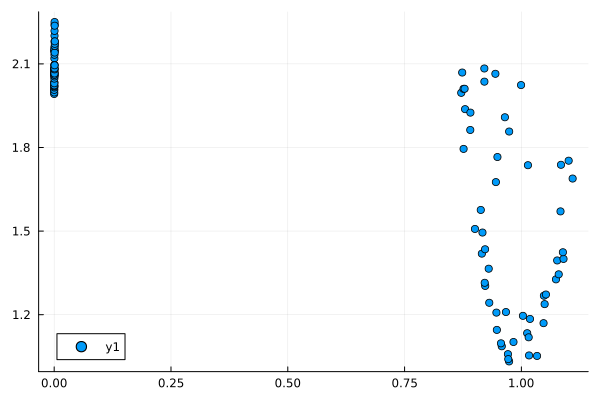

In [5]:
using Plots

x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness))
scatter(x, y)

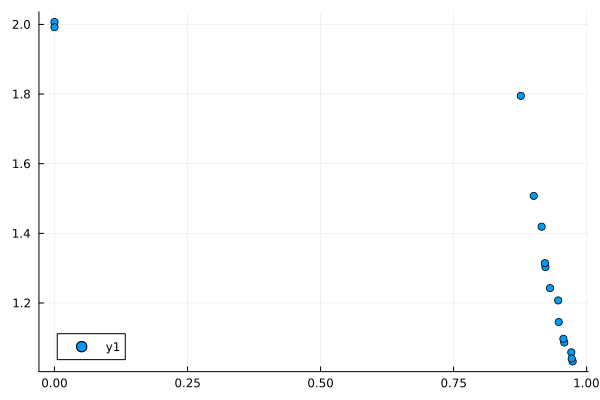

In [6]:
using Plots
idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==0)
x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
scatter(x, y)

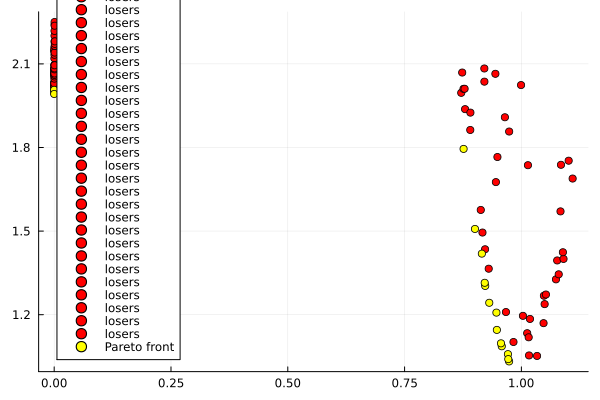

In [7]:
p = scatter()

for i in 1:maximum(EO.get_domination_count(solution.pop_history[end].fitness))
    idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==i)
    x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
    y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
    p = scatter!(p, x, y, label="losers", color=:red)
end

idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==0)
x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
p = scatter!(p, x, y, label="Pareto front", color=:yellow)

p